In [ ]:
import pandas as pd

# Load and clean
df = pd.read_csv("../Data/output.csv")

# Rename columns if needed (make them easy to use)
df = df.rename(columns={"closing_price$": "closing_price", "date": "date"})

# Parse date, sort, and clean price string
df["date"] = pd.to_datetime(df["date"])
df["closing_price"] = (
    df["closing_price"]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)  # remove $ and commas
    .astype(float)
)

df = df.sort_values("date").reset_index(drop=True)

# Quick sanity check
print(df.head())
print(df.tail())
print("Data range:", df["date"].min(), "to", df["date"].max())


        date  closing_price
0 2023-01-20         108.66
1 2023-01-23         108.61
2 2023-01-24         108.05
3 2023-01-25         108.83
4 2023-01-27         109.85
          date  closing_price
635 2025-07-28         174.90
636 2025-07-29         174.29
637 2025-07-30         176.99
638 2025-07-31         177.91
639 2025-08-01         175.78
Data range: 2023-01-20 00:00:00 to 2025-08-01 00:00:00


In [6]:
# Example moving averages: 20-day and 50-day
df["ma_7"] = df["closing_price"].rolling(window=7, min_periods=1).mean()
df["ma_20"] = df["closing_price"].rolling(window=20, min_periods=1).mean()
df["ma_50"] = df["closing_price"].rolling(window=50, min_periods=1).mean()


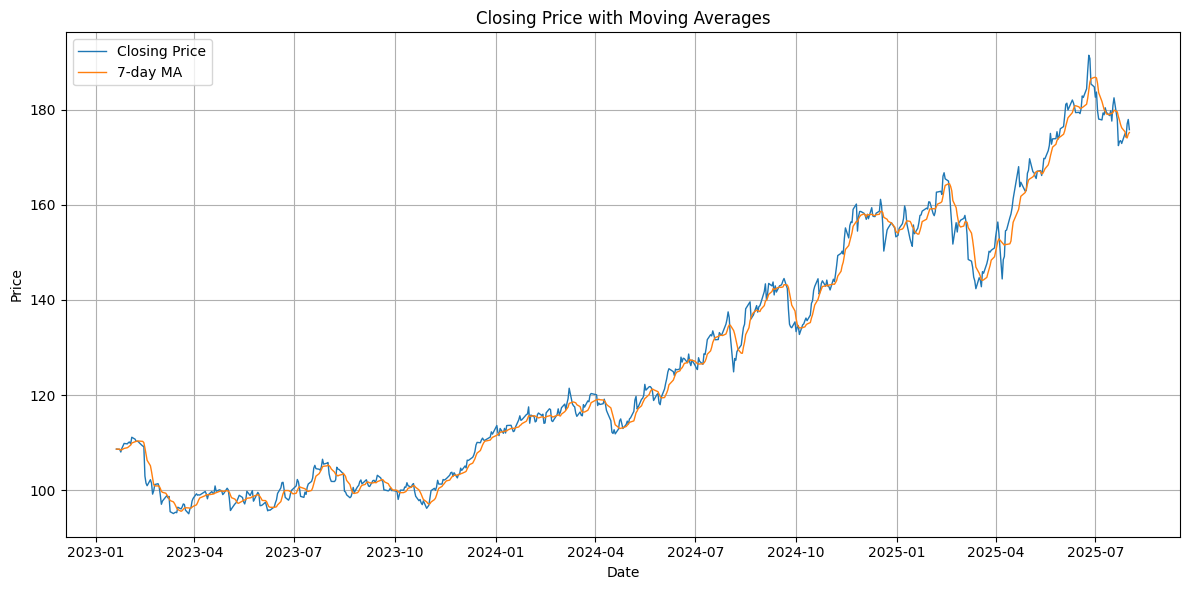

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["closing_price"], label="Closing Price", linewidth=1)
plt.plot(df["date"], df["ma_7"], label="7-day MA", linewidth=1)
plt.title("Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
